In [ ]:
import numpy as np #numerical computing
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualization - plotting library
import seaborn as sb #interface for attractive statistical graphics
from sklearn.model_selection import train_test_split #splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler #Scales features
from sklearn import metrics #Evaluate models
from sklearn.svm import SVC #model training
from xgboost import XGBClassifier #uses an ensemble of decision trees to make predictions, with a focus on boosting performance and handling large datasets efficiently
from sklearn.linear_model import LogisticRegression #predicts if an instance belongs to a particular class (probability)
from imblearn.over_sampling import RandomOverSampler #Handles imbalanced data

import warnings #When warnings are filtered and set to be ignored, they will not be displayed in the output, helping to keep the display clean
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


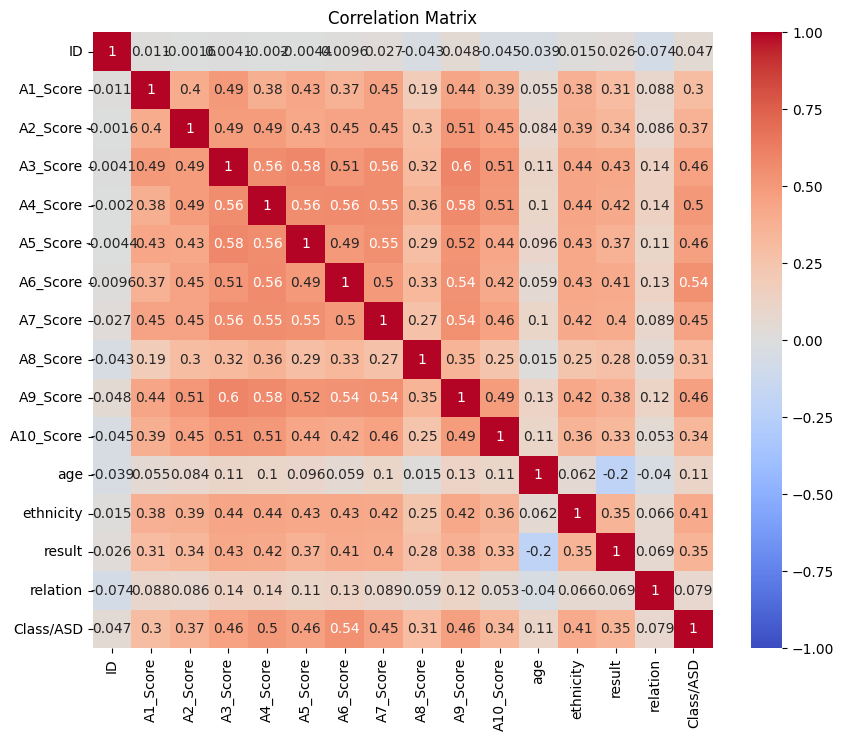

Correlation between 'ethnicity' and 'relation': 0.06618121769650957
Correlation between 'A1_Score' and 'A2_Score': 0.40141867394615277


In [ ]:
import pandas as pd #data processing (manipulation and analysis)
import seaborn as sns #interface for attractive statistical graphics
import matplotlib.pyplot as plt #data visualization - plotting library (create plots and charts)

# Convert 'ethnicity' and 'relation' to categorical codes
df['ethnicity'] = df['ethnicity'].astype('category').cat.codes #function converts the column to a categorical type, cat.codes converts each category to a unique numerical code
df['relation'] = df['relation'].astype('category').cat.codes

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns # function is used to filter the numeric columns and columns retrieves the column names
df_numeric = df[numeric_columns]

# Create a correlation matrix for all numeric columns
correlation_matrix = df_numeric.corr() #calculates the correlation between all pairs of numeric columns in the DataFrame df_numeric

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) #visualizes correlation matrix with annotations (annot=True), using 'coolwarm' color map. vmin and vmax parameters set the range of the color scale to -1 and 1.
plt.title("Correlation Matrix")
plt.show()

# Calculate correlation between 'ethnicity' and 'relation'
correlation_ethnicity_relation = df['ethnicity'].corr(df['relation'])

# Calculate correlation between 'A1_Score' and 'A2_Score' for demonstration
correlation_A1_A2 = df['A1_Score'].corr(df['A2_Score'])

print("Correlation between 'ethnicity' and 'relation':", correlation_ethnicity_relation)
print("Correlation between 'A1_Score' and 'A2_Score':", correlation_A1_A2)

# analyze the correlation between numerical variables in the dataset

In [ ]:
df.shape #number of rows and columns

(800, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe().T #statistical summary of dataframe

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df['ethnicity'].value_counts() #count the occurrences of unique values in a pandas Series providing a frequency distribution of those values

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [ ]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [ ]:
df = df.replace({'yes' : 1, 'no' : 0, '?' : 'Others', 'others' : 'Others'})

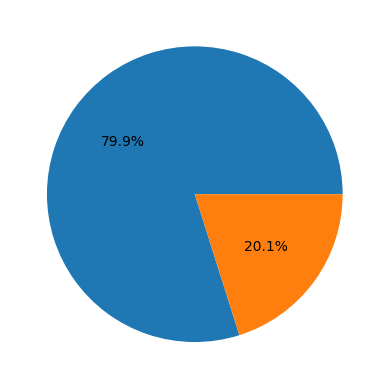

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct = '%1.1f%%') # pie chart specifies the format of the percentage labels displayed on each slice of the chart.
plt.show() #autopct formats text displayed on each slice to show %tage contribution of each value

In [ ]:
ints = []
objects = []
floats = []
for col in df.columns:
  if df[col].dtype == int:
    ints.append(col) #if a column in the df has data type of integer, it adds the name of that column to a list called ints
  elif df[col].dtype == object:
    objects.append(col)  #append means to add an element to the end of a list
  else:
    floats.append(col)

# ints list is a Python list that is being created to store the names of columns in the DataFrame (df) that have integer data types
# knowing what kind of data each column contains (like numbers, categories, or text) is imp when creating new features or building a model to predict something

In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')

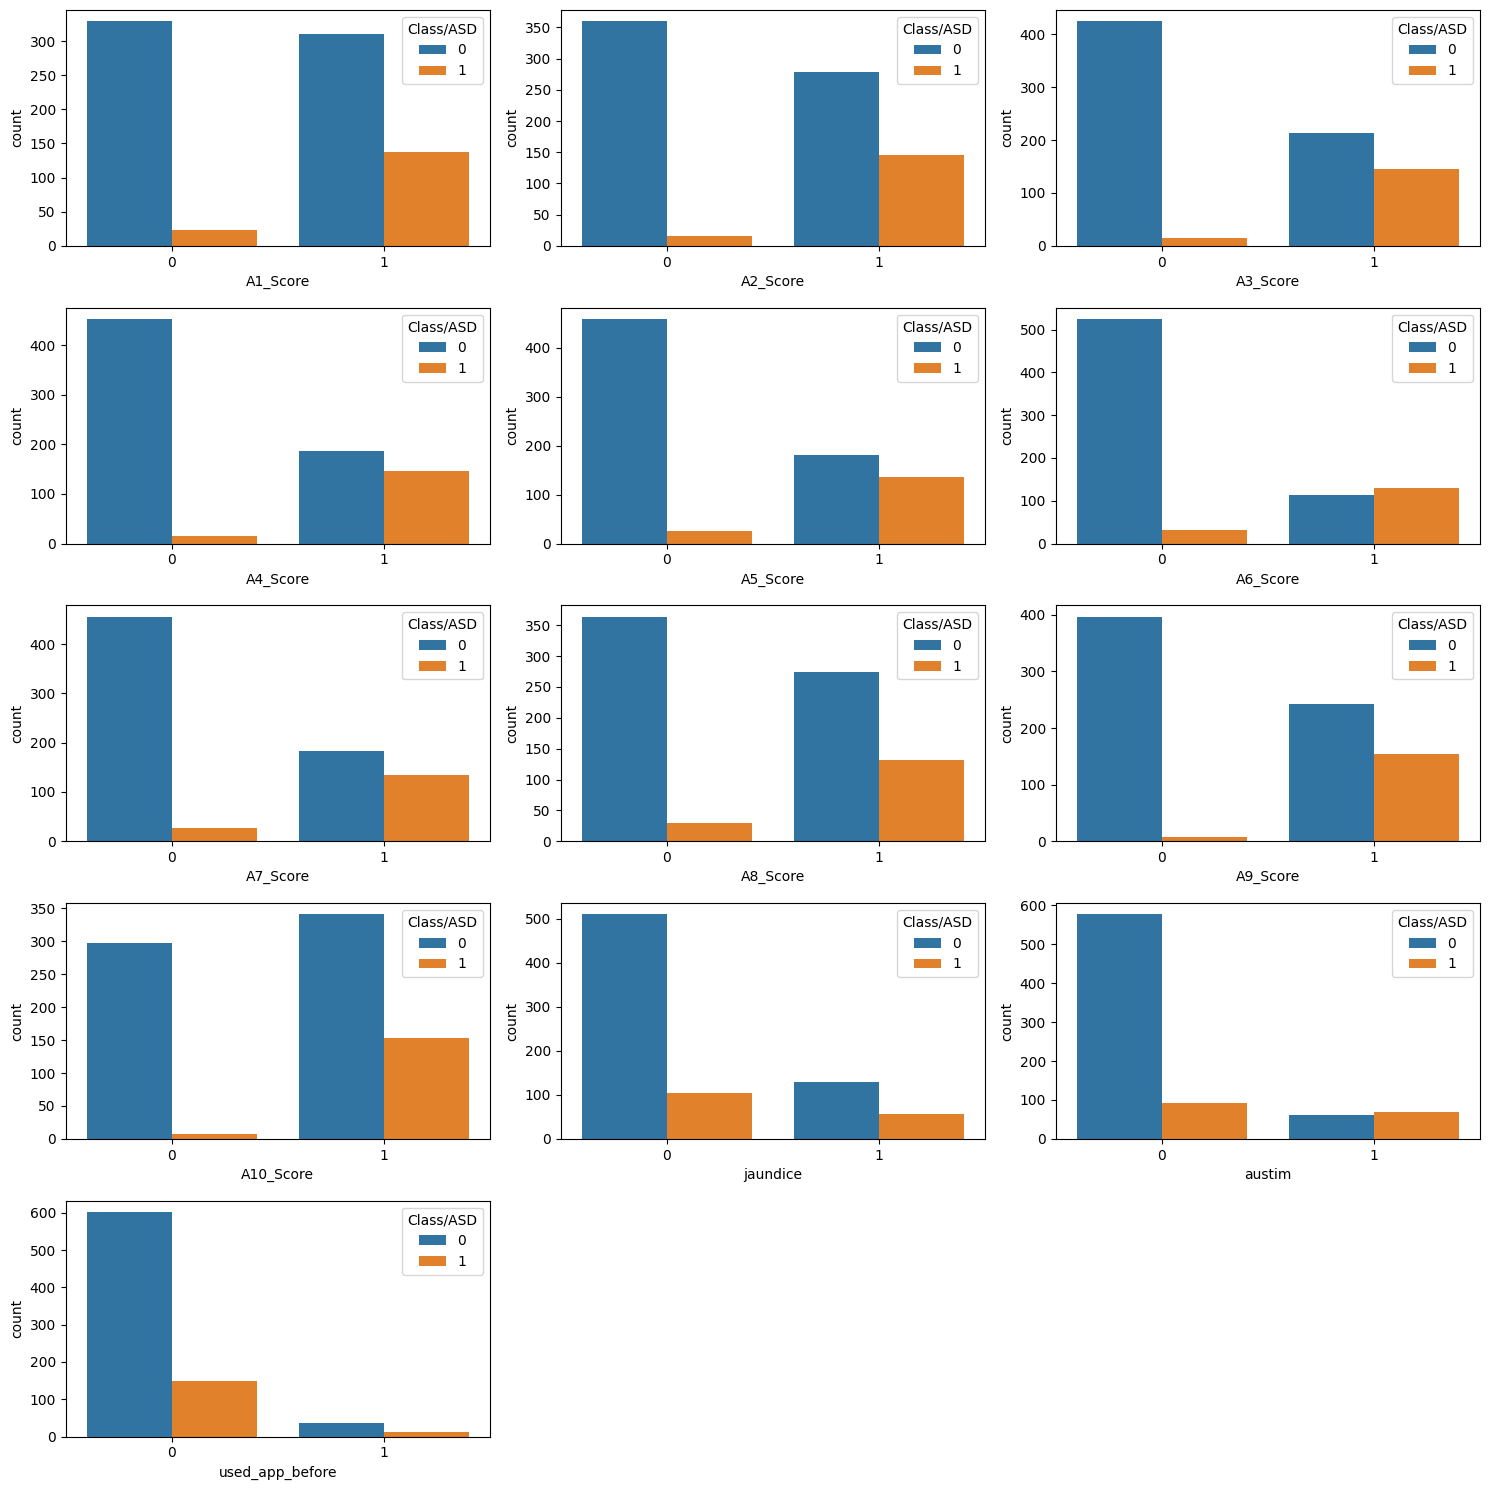

In [ ]:
plt.figure(figsize=(15, 15))
num_cols = 3
num_rows = (len(ints) - 1) // num_cols + 1  # Calculate the number of rows dynamically
for i, col in enumerate(ints):
    plt.subplot(num_rows, num_cols, i + 1)
    sb.countplot(data=df, x=col, hue='Class/ASD')
plt.tight_layout()
plt.show()


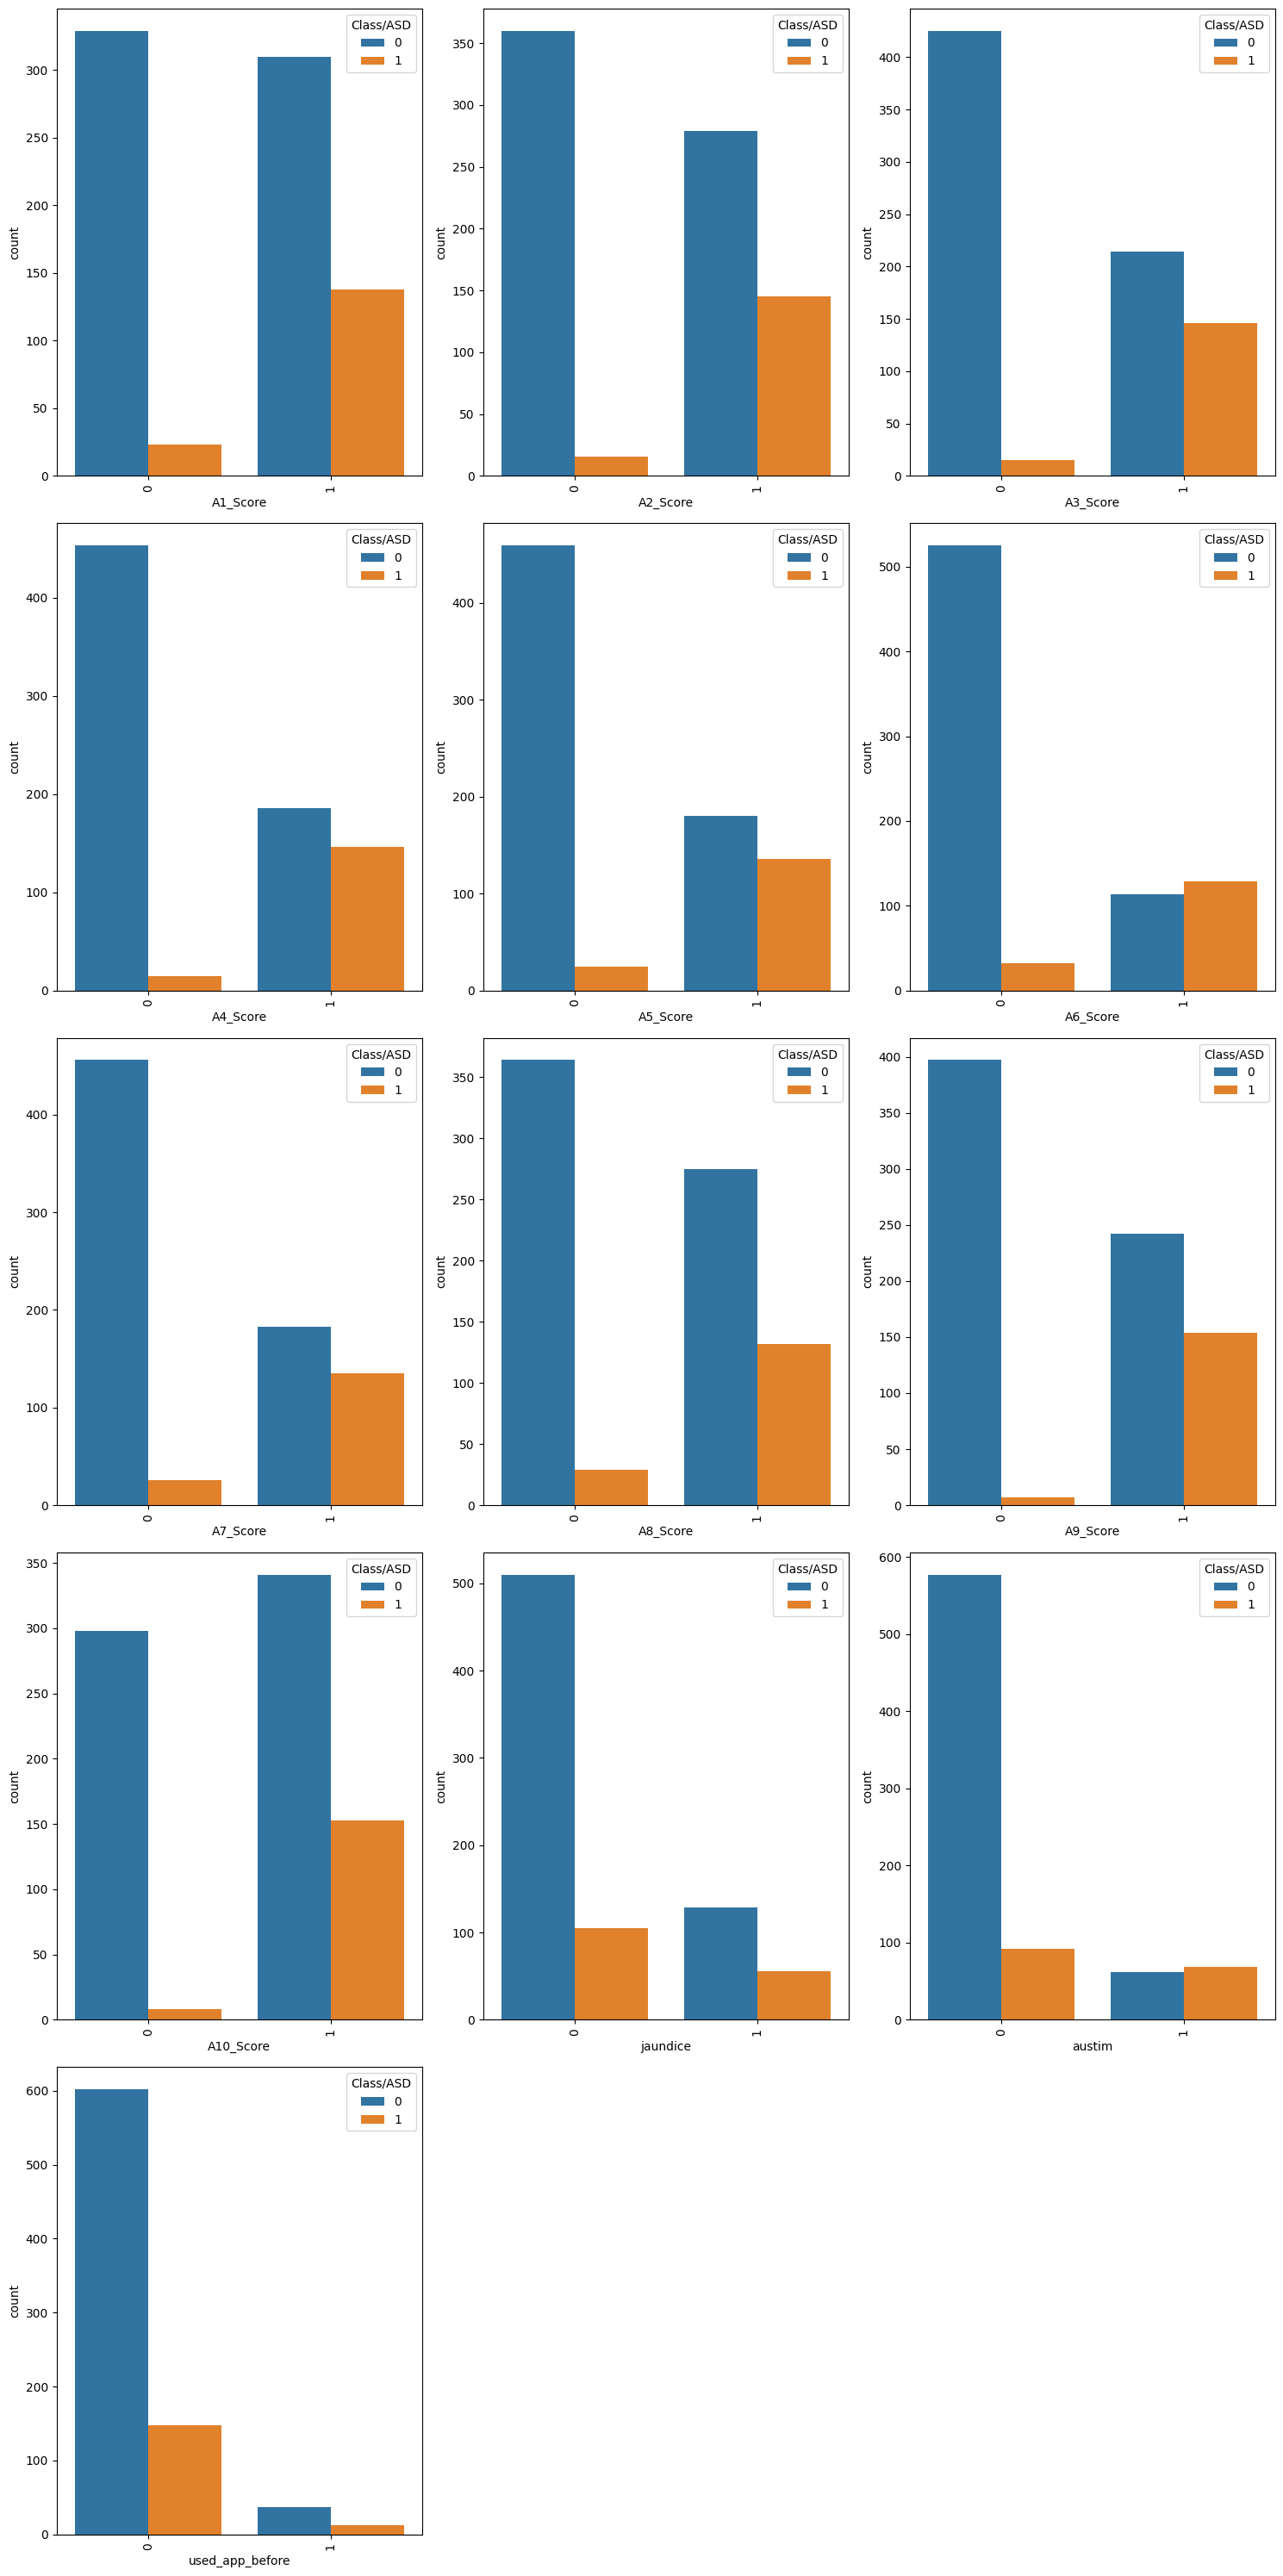

In [ ]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(ints):
    plt.subplot(num_rows, num_cols, i + 1)
    sb.countplot(data=df, x=col, hue='Class/ASD')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

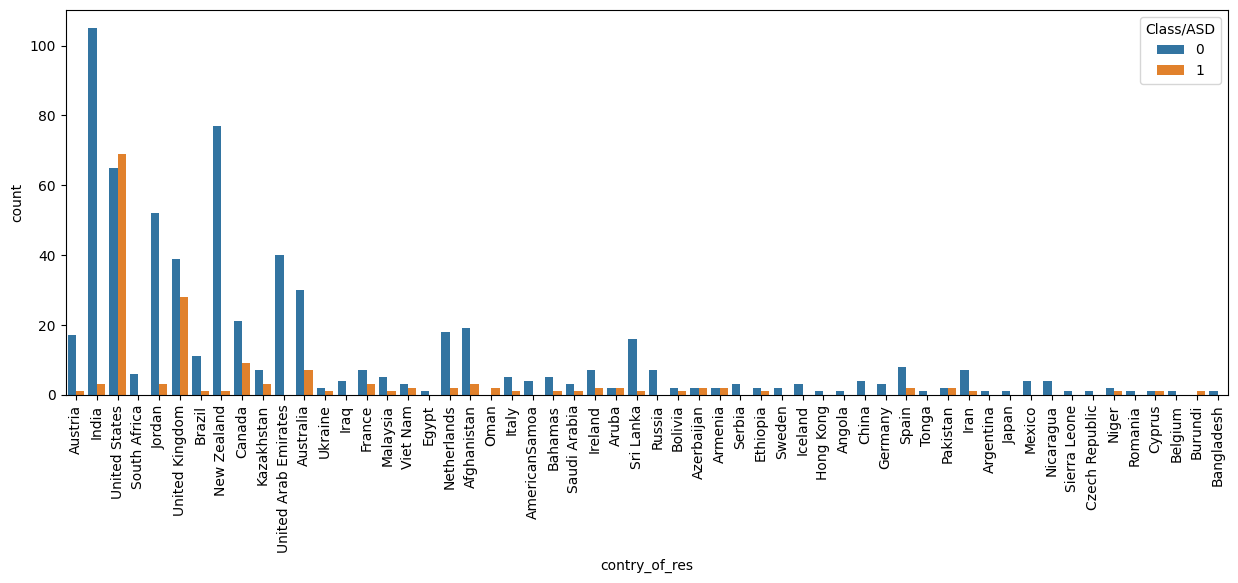

In [ ]:
plt.figure(figsize = (15,5))
sb.countplot(data = df, x = 'contry_of_res', hue = 'Class/ASD') #creates bar plot to show occurrences of each category in a categorical variable.
plt.xticks(rotation = 90)
plt.show()

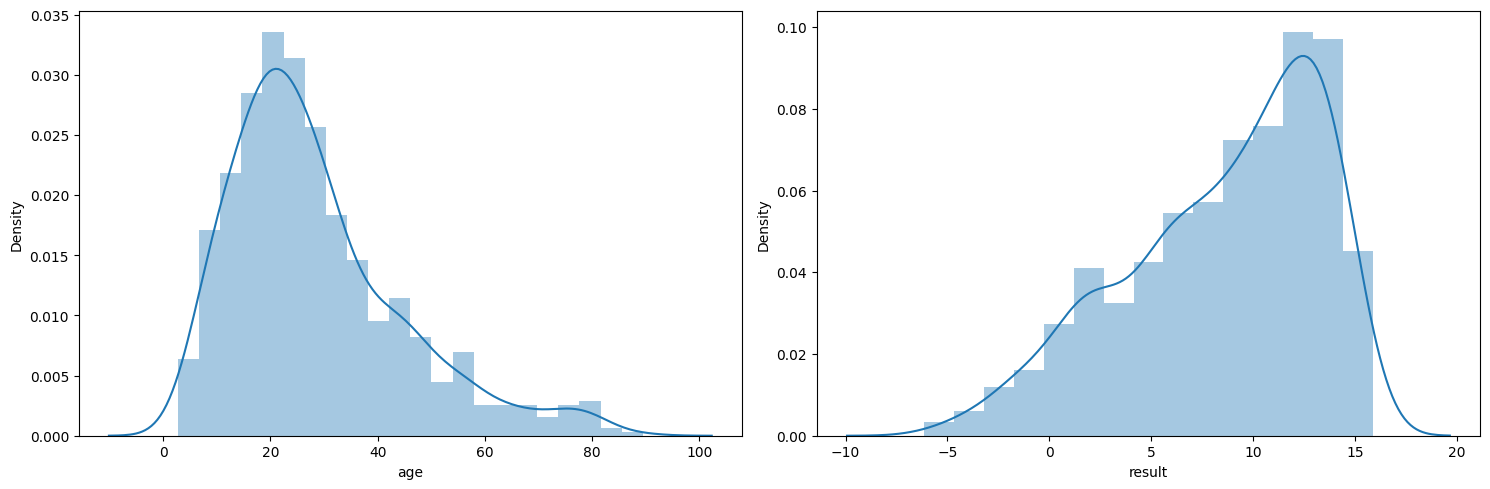

In [ ]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(floats):
  plt.subplot(1, 2, i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame and 'Age' is the column to convert
df['age'] = df['age'].astype(int)

In [ ]:
df['age'].value_counts()

age
22    33
18    31
17    29
21    29
25    27
      ..
4      1
70     1
89     1
71     1
66     1
Name: count, Length: 79, dtype: int64

In [ ]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,cleaned_age,Age
0,1,1,0,1,0,1,0,1,0,1,...,no,no,Austria,no,6.351166,18 and more,5,0,38,38
1,2,0,0,0,0,0,0,0,0,0,...,no,no,India,no,2.255185,18 and more,5,0,47,47
2,3,1,1,1,1,1,1,1,1,1,...,no,yes,United States,no,14.851484,18 and more,5,1,7,7
3,4,0,0,0,0,0,0,0,0,0,...,no,no,United States,no,2.276617,18 and more,5,0,23,23
4,5,0,0,0,0,0,0,0,0,0,...,no,no,South Africa,no,-4.777286,18 and more,5,0,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,no,no,New Zealand,no,12.999501,18 and more,5,0,16,16
796,797,0,1,1,0,0,1,0,1,1,...,no,no,Cyprus,no,13.561518,18 and more,5,0,20,20
797,798,0,0,0,0,0,0,0,0,0,...,yes,no,New Zealand,no,2.653177,18 and more,5,0,5,5
798,799,0,0,0,0,0,0,0,0,0,...,no,no,Canada,no,9.069342,18 and more,5,0,16,16


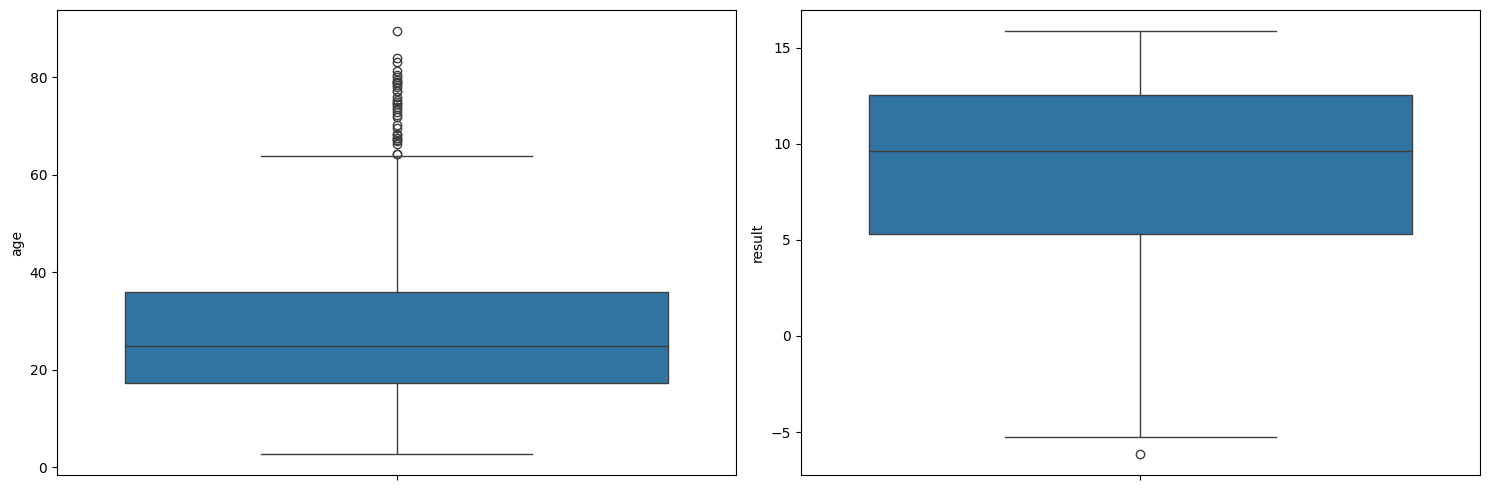

In [ ]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(floats):
  plt.subplot(1, 2, i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
df = df[df['result']>-5]
df.shape

(798, 22)

In [ ]:
def convertAge(age):
  if age < 4:
    return 'Toddler'
  elif age < 12:
    return 'Kid'
  elif age < 18:
    return 'Teenager'
  elif age < 40:
    return 'Young'
  else:
    return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

In [ ]:
df['age'] = df['age'].apply(lambda x: np.log(x))

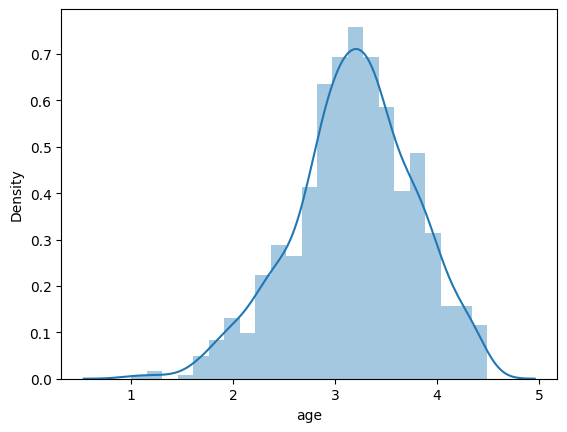

In [ ]:
sb.distplot(df['age'])
plt.show()

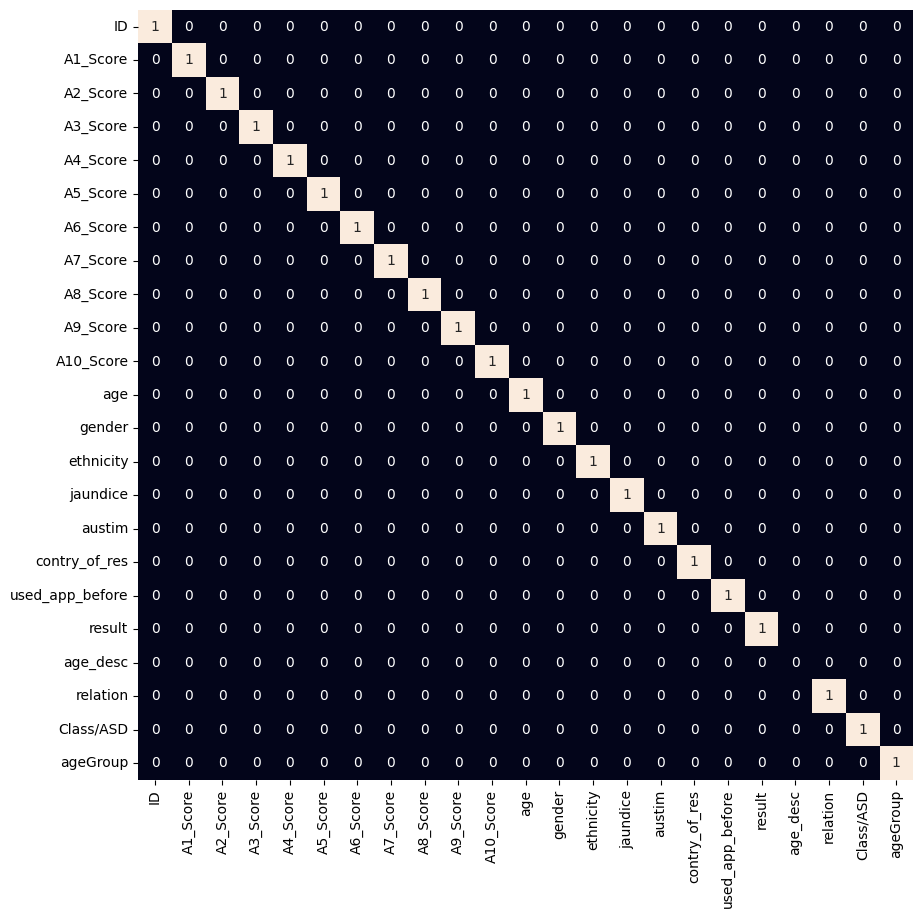

In [ ]:
def encode_labels(data):
	for col in data.columns:

	  if data[col].dtype == 'object':
		  le = LabelEncoder() #encode categorical values to numerical labels
		  data[col] = le.fit_transform(data[col]) #encoded numerical labels replace the original categorical values in dataframe

	return data #function returns the modified dataframe

df = encode_labels(df)

# Heatmap to visualize correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False) #correlation b/w pair of variables greater than 0.8, then it's marked true else false. Annotations are added to show correlation values.
plt.show()


In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1) # resulting DataFrame (features) has only columns that will be used as features for training machine learning model
target = df['Class/ASD'] # Assigns the column 'Class/ASD' from the original DataFrame df to the variable target. This column contains the target variable, which is what the model aims to predict. It represents whether an individual has Autism Spectrum Disorder (ASD) or not.


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As data was imbalanced, we balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train) #resamples training data to balance the classes.
X.shape, Y.shape

((1026, 18), (1026,))

In [ ]:
scaler = StandardScaler() #scale features
X = scaler.fit_transform(X) #fits scaler to data, calculate mean and standard deviation of each feature, transforms data, X is scaled features
X_val = scaler.transform(X_val) #scales validation features using transform method

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = 'rbf')] #svc is ml algo that finds best hyperplane to separate different classes, transforms data in high-dim space using radial basis function allowing complex decision boundaries

for model in models:
  model.fit(X, Y)

  print(f'{model} : ') #name of current model being evaluated
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X))) # ROC AUC score is common metric to evaluate classification models
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val))) #calculates and prints validation accuracy of model using validation data (X_val and Y_val)
  print()


LogisticRegression() : 
Training Accuracy :  0.8664717348927875
Validation Accuracy :  0.7782258064516128

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7190860215053765

SVC() : 
Training Accuracy :  0.9405458089668616
Validation Accu

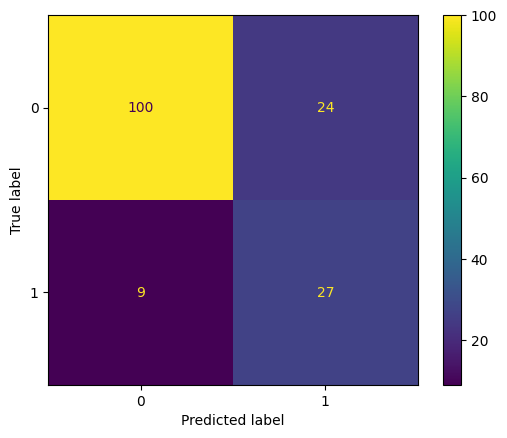

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix: how well model performs correctly/incorrectly classifying instances of different classes
cm = confusion_matrix(Y_val, models[0].predict(X_val)) #compare true labels (Y_val) with predicted labels generated by first model (models[0]) using validation data (X_val)

# Display confusion matrix
ConfusionMatrixDisplay(cm, display_labels=models[0].classes_).plot() #Labels to display on the confusion matrix, taken from the classes predicted by the first model
plt.show()

#True labels are the actual correct labels for the data points, and predicted labels are the labels predicted by the machine learning model.